In [129]:
### WOW... it worked somehow.. 

# Import need libraries
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd # Import pandas module
import yfinance as yf

# Defining the object of and attributes of the GUI
class StockPortfolioTracker:
    def __init__(self, root):
        self.root = root
        self.root.title("Investinspect")  # Set the window title
        self.stocks = {}
        
        # Create title label
        #self.title_label = tk.Label(root, text="The Pulse of your Investment Portfolio", font=('Arial', 17))
        #self.title_label.grid(row=0, column=0, columnspan=2)
        
        # Create labels
        self.stock_label = tk.Label(root, text="Stock Symbol:")
        self.stock_label.grid(row=0, column=0)
        self.shares_label = tk.Label(root, text="Number of Shares:")
        self.shares_label.grid(row=1, column=0)
        self.price_label = tk.Label(root, text="Current Price:")
        self.price_label.grid(row=2, column=0)
        self.price = 0
        # Create entry fields
        self.stock_entry = tk.Entry(root)
        self.stock_entry.grid(row=0, column=1)
        self.shares_entry = tk.Entry(root)
        self.shares_entry.grid(row=1, column=1)
        # these lines were the fields for the user to enter the current amount of their stock
        #self.price_entry = tk.Entry(root)
        #self.price_entry.grid(row=2, column=1)
        
        # Replaced the entry field to automatically populate the label with the real time current price  
        # from yfinance
        self.price_label = ttk.Label(master = root, text = self.price, font = 'Calibri 11')
        self.price_label.grid(row=2, column=1)
        self.price_entry = float(self.price_label.cget("text"))

        # Create button that adds the stock and the quantity to the listbox
        self.button = tk.Button(root, text="Add Stock", command=self.add_stock)
        self.button.grid(row=3, column=0, columnspan=2)

        # Create listbox to display stocks
        self.listbox = tk.Listbox(root)
        self.listbox.grid(row=4, column=0, columnspan=2)

        # Create label to display total portfolio value
        self.total_label = tk.Label(root, text="")
        self.total_label.grid(row=5, column=0, columnspan=2)

        # Create empty DataFrame to store the data
        self.df = pd.DataFrame(columns=["Stock Symbol", "Number of Shares", "Current Price"]) # Add this line

# Function that contains the 'stock' details
    def add_stock(self):
        # user inputs the stock 
        stock = self.stock_entry.get()
        # user inputs the amount of shares
        shares = float(self.shares_entry.get())
        # Fetching the Real time prices from yahoo finance
        ystock = yf.Ticker(stock)
        self.price = ystock.info.get('currentPrice')
       
        #my original code -- user had to add the current price manually
        #price = float(self.price_entry.get())
        
        # Calculates the value of the stock determined by the amount of shares
        self.stocks[stock] = self.price * shares

        # Clear the entry fields
        self.stock_entry.delete(0, tk.END)
        self.shares_entry.delete(0, tk.END)
        #self.price_entry.delete(0, tk.END)

        # Update listbox and total portfolio value
        self.update_listbox()
        self.update_total()

        # Append the data to the DataFrame
        #self.df = self.df.append({"Stock Symbol": stock, "Number of Shares": shares, "Current Price": price}, ignore_index=True) # Add this line
        self.df = pd.concat([self.df, pd.DataFrame({"Stock Symbol": 
                                                    stock, "Number of Shares": 
                                                    shares, "Current Price": 
                                                    self.price}, 
                                                   index=[0])]) 
                           
        # Save the table to a CSV file
        self.df.to_csv("stock_data.csv", index=False) # Add this line
        self.price_label.config(text=self.price)       
        messagebox.showinfo("Success", "Stock added successfully!")

    def update_listbox(self):
        self.listbox.delete(0, tk.END)
        for stock, value in self.stocks.items():
            self.listbox.insert(tk.END, f"{stock}: ${value}")

    def update_total(self):
        total_value = sum(self.stocks.values())
        total_value = round(total_value, 2)    
        self.total_label.config(text=f"Total Portfolio Value: ${total_value}")
        
        
    
        
root = tk.Tk()
app = StockPortfolioTracker(root)
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/kerim/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/_6/5tg9nlfd0rq_92tkjdh9t2p80000gn/T/ipykernel_1076/2151482707.py", line 73, in add_stock
    self.stocks[stock] = self.price * shares
                         ~~~~~~~~~~~^~~~~~~~
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'


In [155]:
# Set and read the CSV file from Path
from pathlib import Path
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')
portfolio_df = pd.read_csv(Path("stock_data.csv"))

Total Portfolio Value: 38107.56


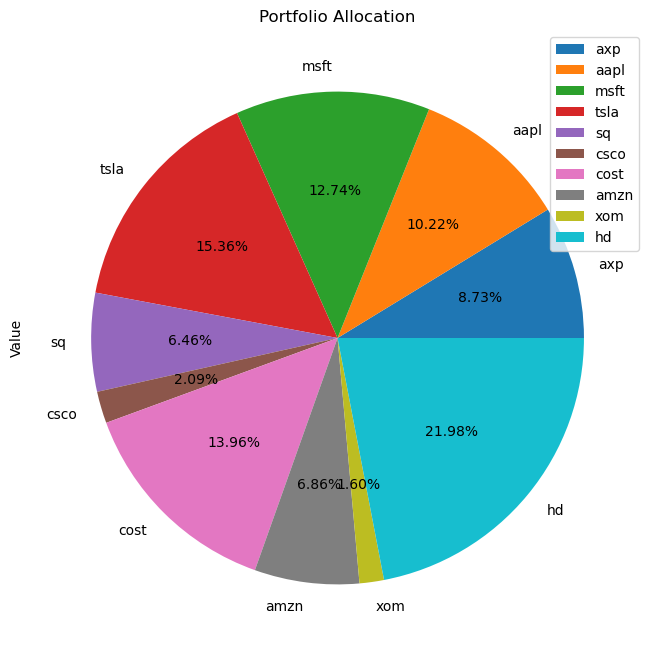

In [156]:
portfolio_df['Stock Holding Value'] = portfolio_df['Current Price'] * portfolio_df['Number of Shares']

total_portfolio_value = portfolio_df['Stock Holding Value'].sum().round(2)
print("Total Portfolio Value:", total_portfolio_value)

portfolio_df = portfolio_df.set_index('Stock Symbol')
each_stock_value = pd.DataFrame((portfolio_df['Current Price'] * portfolio_df['Number of Shares']).round(2))
percentage_of_portfolio = ((each_stock_value / total_portfolio_value) * 100).round(2)

portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))
plt.legend(loc='upper right')

# Save plot in the images folder.
plt.savefig('gui_images/portfolio_allocation.png')

In [157]:
portfolio_df

,Number of Shares,Current Price,Stock Holding Value
Stock Symbol,,,
axp,18.0,184.79,3326.22
aapl,20.0,194.68,3893.60
msft,13.0,373.54,4856.02
tsla,23.0,254.50,5853.50
sq,32.0,76.90,2460.80
csco,16.0,49.70,795.20
cost,8.0,665.16,5321.28
amzn,17.0,153.84,2615.28
xom,6.0,101.73,610.38


In [158]:
portfolio_df = portfolio_df.reset_index()
portfolio_df['Stock Symbol'] = portfolio_df['Stock Symbol'].str.upper()



if 'Stock Symbol' in portfolio_df.columns:
    portfolio_tickers = portfolio_df['Stock Symbol']
if 'Number of Shares' in portfolio_df.columns:
    stock_shares = portfolio_df['Number of Shares']


portfolio_tickers =(portfolio_tickers).tolist()
stock_shares =(stock_shares).tolist()

historical_data = {}
for stock_symbol in portfolio_tickers:
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']

# Convert historical_data to a DataFrame
historical_data_df = pd.DataFrame(historical_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [159]:
# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']

#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
portfolio_returns = historical_data_df.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
combined_returns

[*********************100%%**********************]  1 of 1 completed


,SP500,AXP,AAPL,MSFT,TSLA,SQ,CSCO,COST,AMZN,XOM,HD
Date,,,,,,,,,,,
2018-12-26,0.049594,0.048492,0.070422,0.068310,0.103930,0.090694,0.054369,0.045476,0.094452,0.047779,0.064120
2018-12-27,0.008563,0.008951,-0.006490,0.006166,-0.030544,0.015004,0.010360,0.012334,-0.006295,0.004371,0.012123
2018-12-28,-0.001242,-0.002746,0.000512,-0.007808,0.056116,-0.004987,-0.003263,0.004774,0.011207,-0.011169,-0.000587
2018-12-31,0.008492,0.009532,0.009665,0.011754,-0.003205,0.003938,0.013093,0.008266,0.016204,0.000293,0.009400
2019-01-02,0.001268,0.003777,0.001141,-0.004430,-0.068149,0.019790,-0.008770,0.005154,0.024741,0.021997,0.003434
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15,-0.000076,0.009225,-0.002726,0.013117,0.009759,-0.007357,0.008697,0.044453,0.017298,-0.006694,0.006225
2023-12-18,0.004528,0.012465,-0.008503,0.005179,-0.005602,-0.004447,0.007419,0.034031,0.027339,0.007433,-0.009011
2023-12-19,0.005866,0.016360,0.005360,0.001637,0.020390,0.046427,-0.001194,-0.005138,-0.001817,0.013182,0.003592


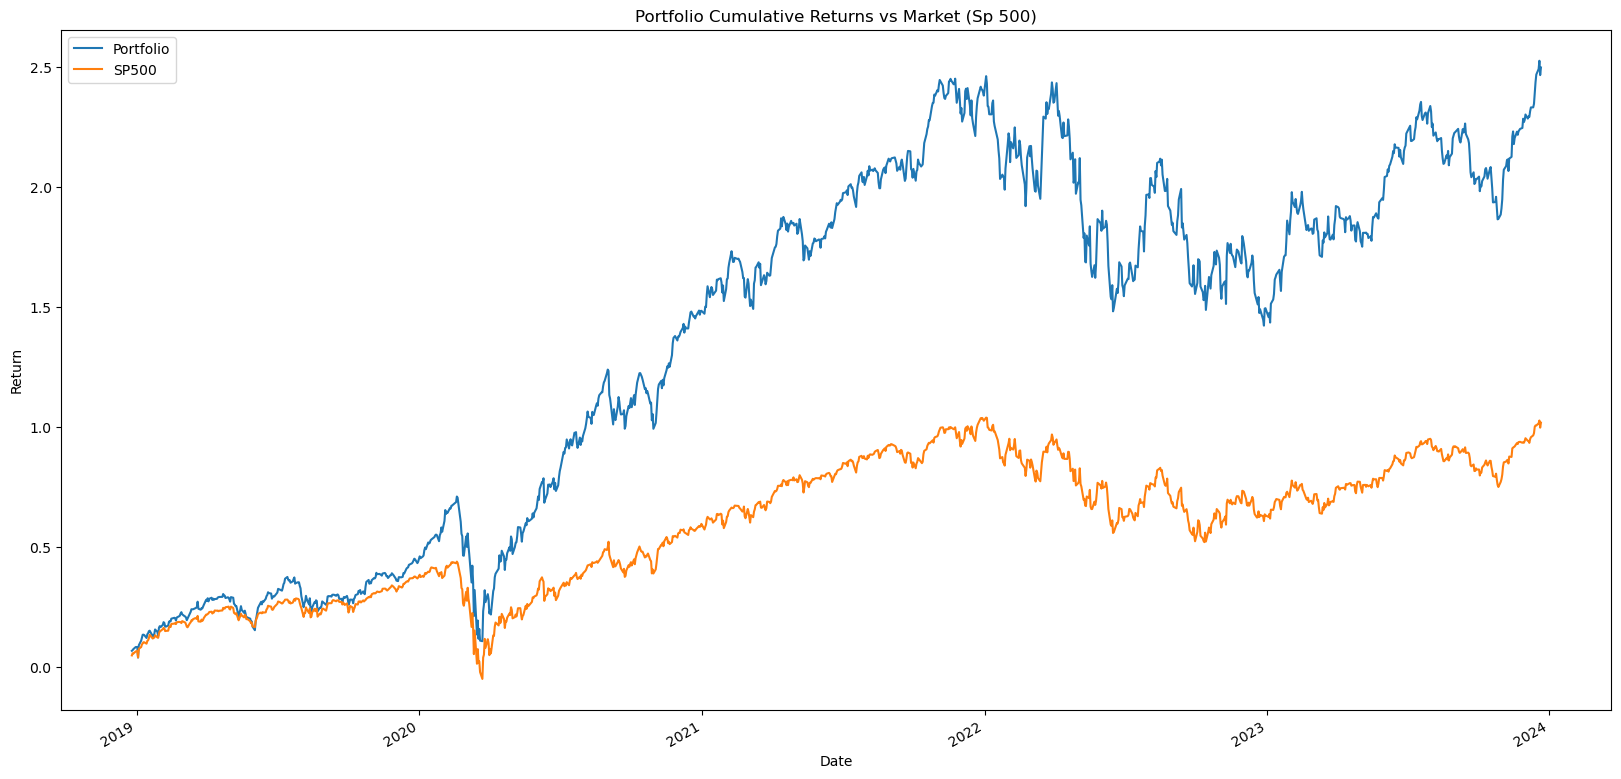

In [160]:
# Sum the average returns of the portfolio and calculate cumulative returns of the portfolio and then plot it.
portfolio_average_returns = portfolio_returns.mean(axis=1)
portfolio_cumulative_returns = (1 + portfolio_average_returns).cumprod() - 1
ax = portfolio_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
# Calculate cumulative returns of th market and plot it against our portfolio.
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, label='SP500', legend=True)

# Save plot in the images folder.
plt.savefig('gui_images/cumulative_returns.png')

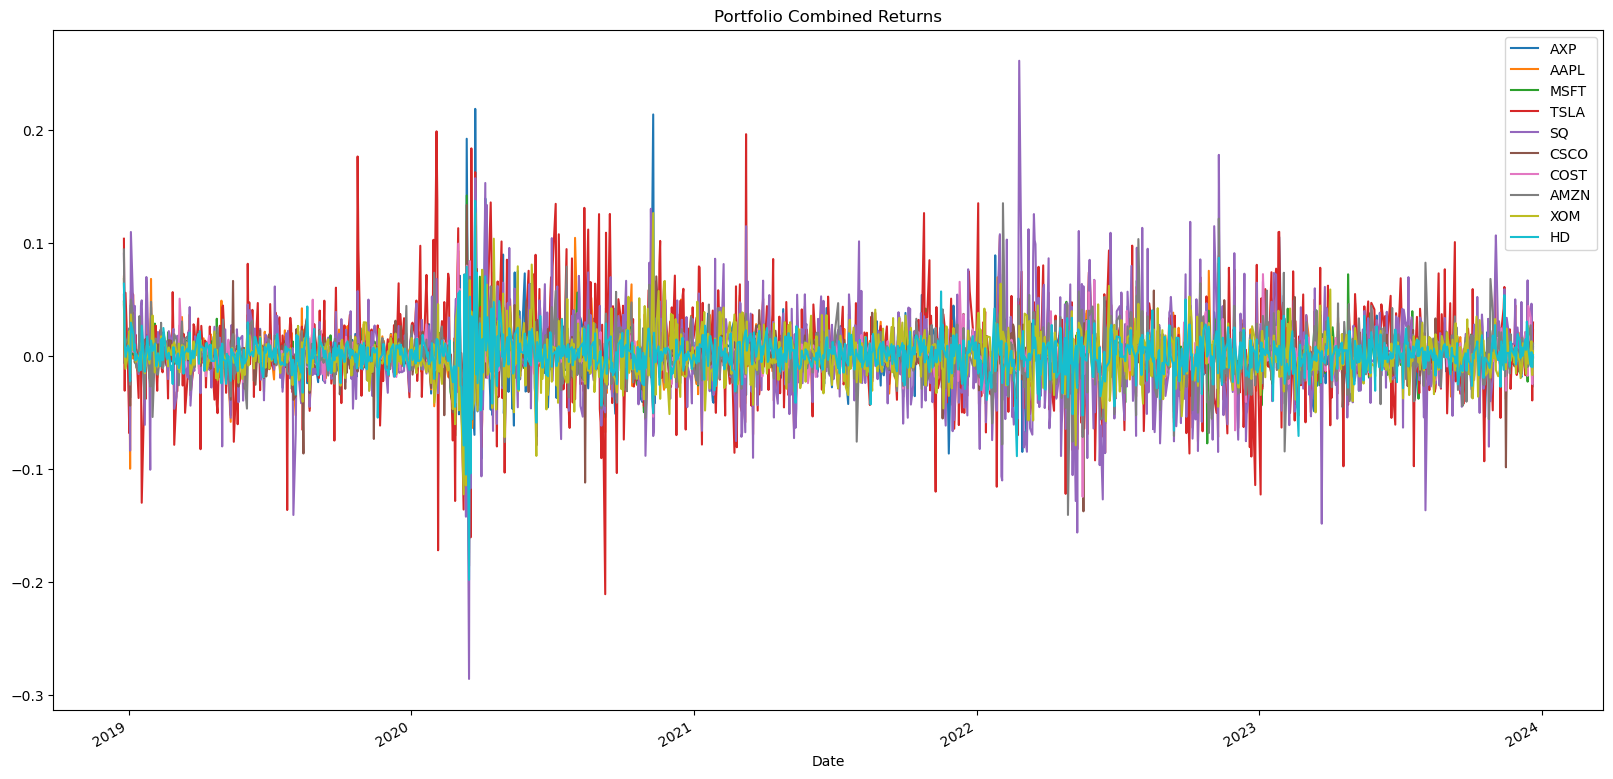

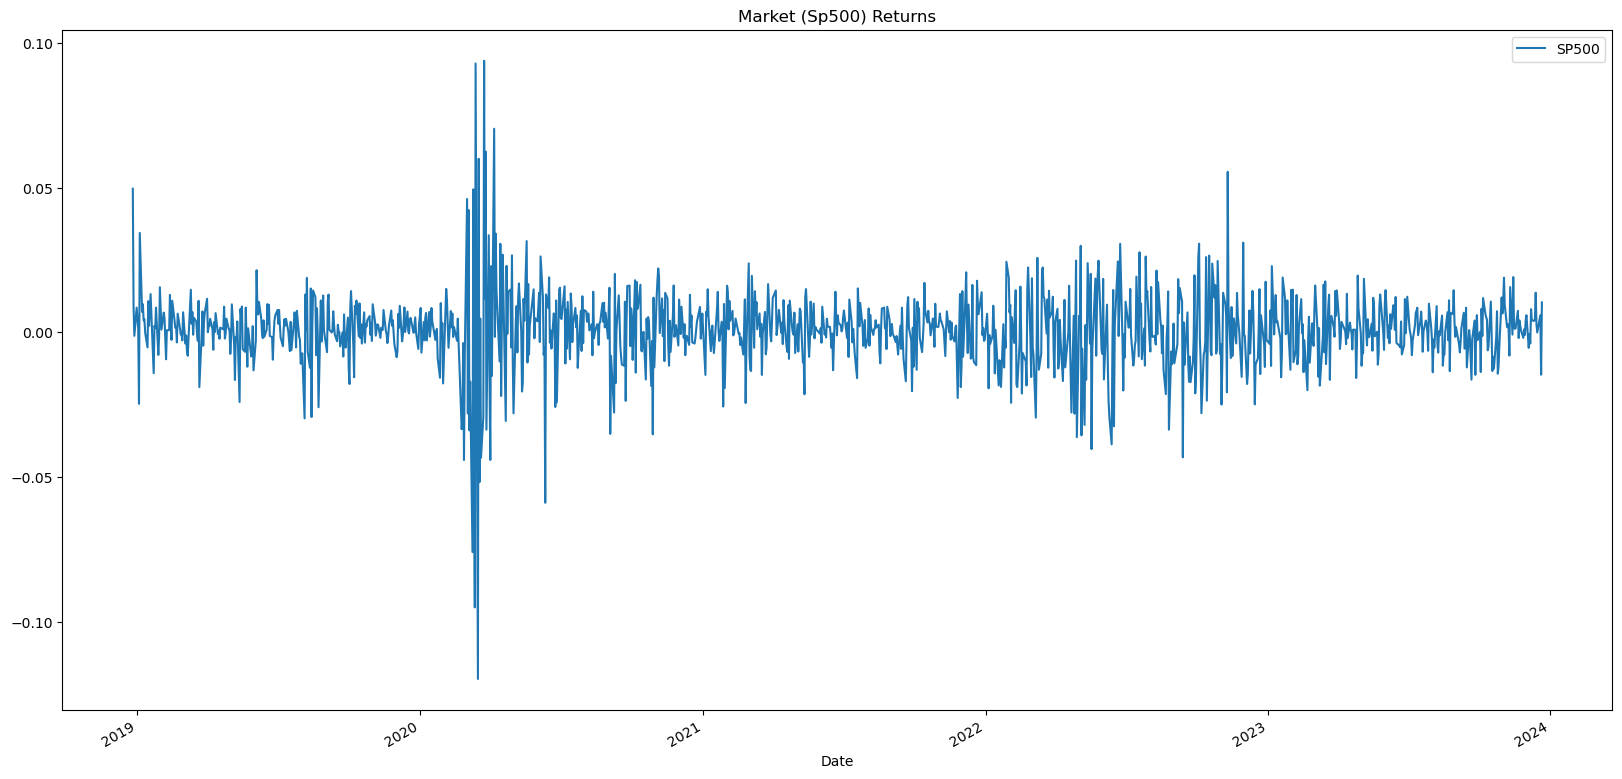

In [161]:
portfolio_returns.plot(figsize=(20,10),title='Portfolio Combined Returns', legend=True)
sp500_returns.plot(figsize=(20,10),title='Market (Sp500) Returns', legend=True)
plt.savefig('gui_images/portfolio_returns.png')
plt.savefig('gui_images/sp500_returns.png')

In [162]:
portfolio_returns
stock_shares

[18.0, 20.0, 13.0, 23.0, 32.0, 16.0, 8.0, 17.0, 6.0, 24.0]

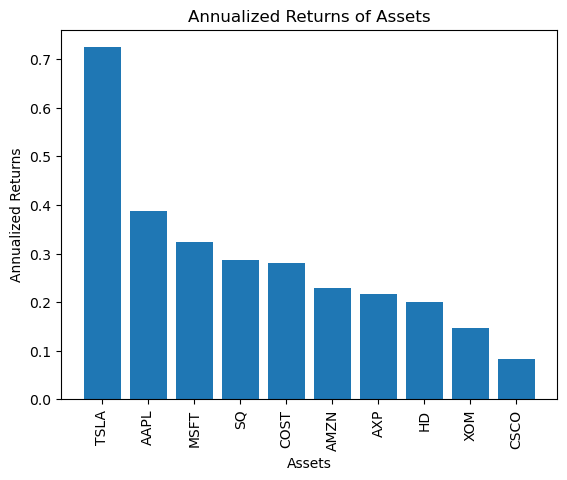

In [163]:
# define the risk free rate
risk_free_rate = 0.04/252 # annualized yield of 3-month Treasury bill divided by 252 trading days

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate


# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)

# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')

plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets')
plt.savefig('gui_images/annualized_returns.png')

In [164]:
# creat a dataframe to store the annual returns, annual risks, 
# annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)


,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
AAPL,0.387128,0.323906,7.702555,AAPL,1.195184
COST,0.279679,0.238194,2.197429,COST,1.174161
TSLA,0.724382,0.649640,16.620787,TSLA,1.115052
MSFT,0.323472,0.306663,4.165135,MSFT,1.054812
HD,0.200617,0.287407,4.774810,HD,0.698025
AMZN,0.228970,0.354939,3.852498,AMZN,0.645097
AXP,0.215905,0.378583,3.846289,AXP,0.570297
SQ,0.286849,0.636729,9.139158,SQ,0.450503
XOM,0.147672,0.344867,0.846034,XOM,0.428200
CSCO,0.082756,0.283946,1.284089,CSCO,0.291449


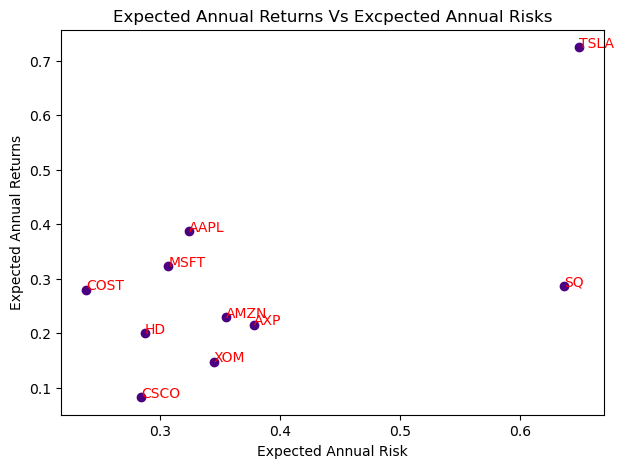

In [165]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')
plt.savefig('gui_images/portfolio_risk_return.png')

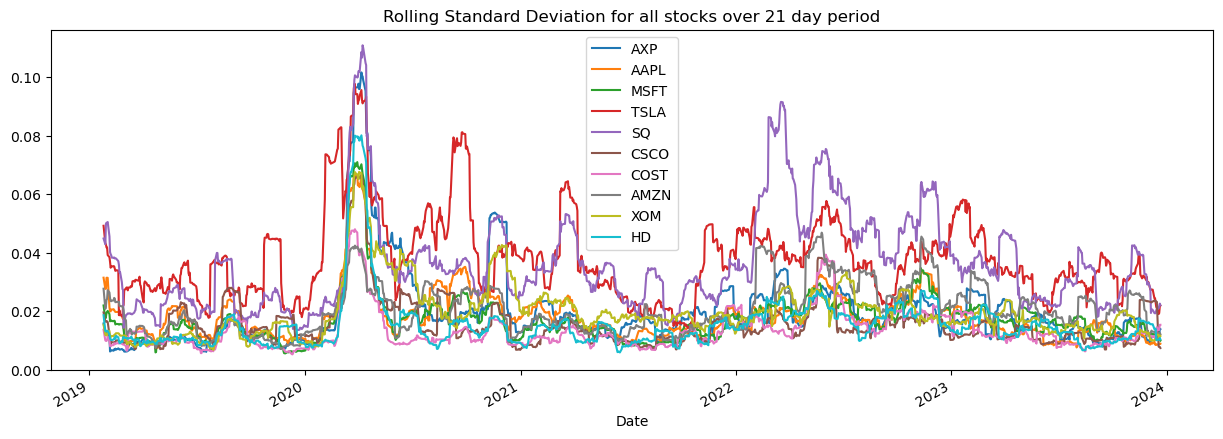

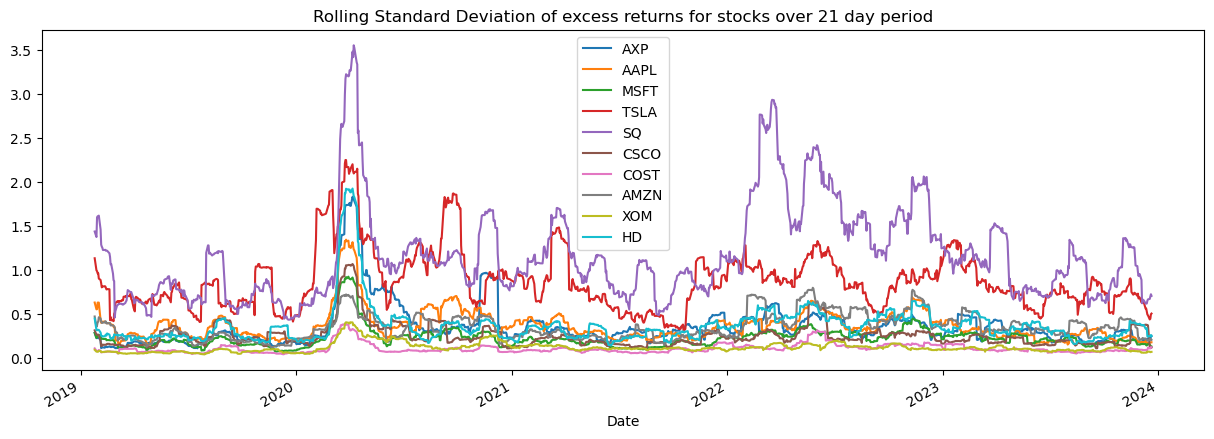

In [166]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')
plt.savefig('gui_images/standard_deviation.png')
plt.savefig('gui_images/excess_return.png')

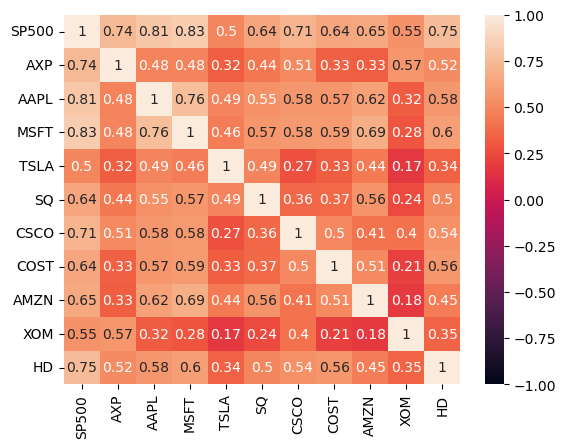

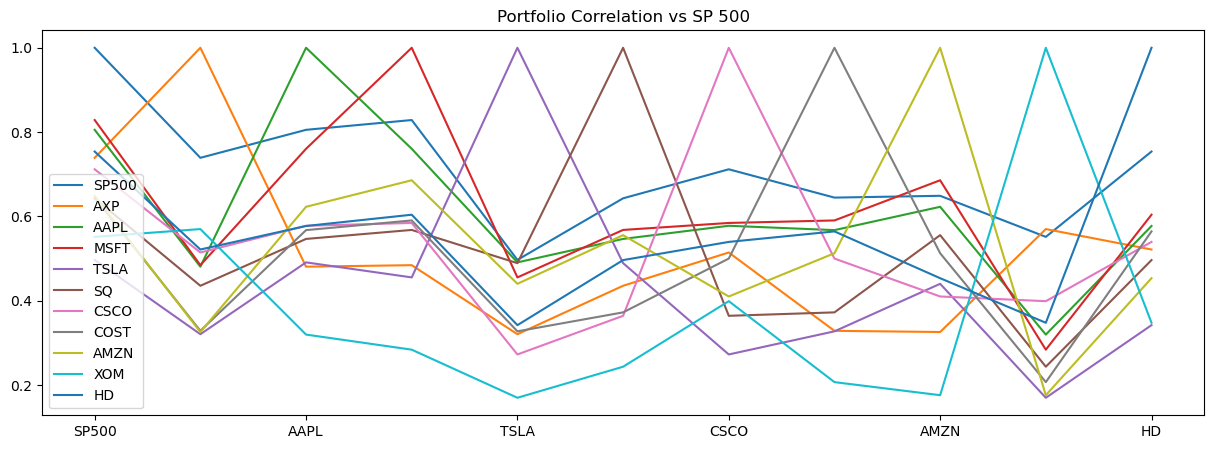

In [168]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
correlation_matrix.plot(figsize=(15,5), title='Portfolio Correlation vs SP 500')
plt.savefig('gui_images/portfolio_correlation.png')